In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [2]:
def get_sp500_tickers():
    sp500_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    sp500_df = sp500_table[0]
    tickers = sp500_df['Symbol'].tolist()
    tickers = [ticker.replace('.', '-') for ticker in tickers]
    return tickers

In [3]:
def get_realtime_data(tickers):
    end_date = datetime.datetime.today().strftime('%Y-%m-%d')
    start_date = (datetime.datetime.today() - datetime.timedelta(days=365)).strftime('%Y-%m-%d')
    data = yf.download(tickers, start=start_date, end=end_date)
    if isinstance(data.columns, pd.MultiIndex):
        if 'Adj Close' in data.columns.levels[0]:
            data = data.xs('Adj Close', axis=1, level=0)
        else:
            data = data.xs('Close', axis=1, level=0)
    data.dropna(inplace=True)
    return data


In [4]:

def run_monte_carlo(stock_data, num_portfolios=10000):
    daily_returns = stock_data.pct_change().dropna()
    mean_returns = daily_returns.mean() * 252
    cov_matrix = daily_returns.cov() * 252
    
    num_assets = len(stock_data.columns)
    results = np.zeros((3, num_portfolios))
    weights_record = []
    
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)
        
        port_return = np.sum(mean_returns * weights)
        port_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe = port_return / port_std if port_std != 0 else 0
        
        results[0, i] = port_return
        results[1, i] = port_std
        results[2, i] = sharpe

    results_df = pd.DataFrame({
        "Return": results[0],
        "Risk": results[1],
        "Sharpe": results[2]
    })
    mvp_idx = results_df["Risk"].idxmin(skipna=True)
    tangency_idx = results_df["Sharpe"].idxmax(skipna=True)
    
    mvp_weights = weights_record[mvp_idx]
    tangency_weights = weights_record[tangency_idx]
    return results_df, mvp_weights, tangency_weights

In [5]:
def plot_efficient_frontier(results_df, mvp_idx, tangency_idx):
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(results_df["Risk"], results_df["Return"],
                          c=results_df["Sharpe"], cmap='viridis', marker='o', s=10, alpha=0.3)
    plt.colorbar(scatter, label='Sharpe Ratio')
    
   
    plt.scatter(results_df.loc[mvp_idx, "Risk"], results_df.loc[mvp_idx, "Return"],
                marker='*', color='red', s=500, label='MVP (Min Risk)')
    
    plt.scatter(results_df.loc[tangency_idx, "Risk"], results_df.loc[tangency_idx, "Return"],
                marker='*', color='blue', s=500, label='Tangency (Max Sharpe)')
    
    plt.title('Efficient Frontier')
    plt.xlabel('Risk (Std. Deviation)')
    plt.ylabel('Expected Return')
    plt.legend()
    plt.show()

In [6]:
def print_integrated_top_stocks(mvp_weights, tangency_weights, tickers, top_n=10):
    integrated_df = pd.DataFrame({
        "Ticker": tickers,
        "MVP_Weight": mvp_weights,
        "Tangency_Weight": tangency_weights
    })
    integrated_df["Average_Weight"] = (integrated_df["MVP_Weight"] + integrated_df["Tangency_Weight"]) / 2
    integrated_df.sort_values(by="Average_Weight", ascending=False, inplace=True)
    
    print(f"\nTop {top_n} Stocks (Based on Average Weight from MVP & Tangency Portfolios):")
    print(integrated_df.head(top_n))


Fetching real-time stock data...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  503 of 503 completed



Running Monte Carlo Simulation...


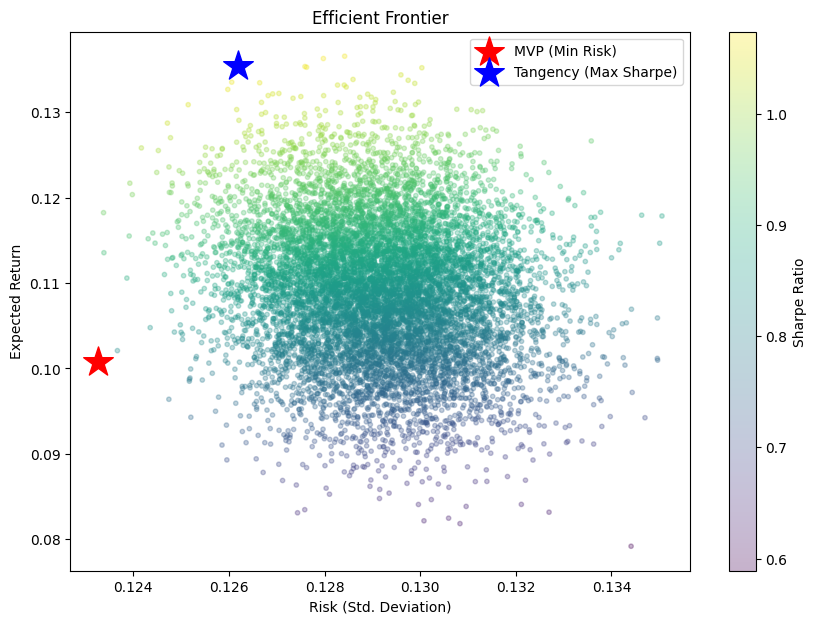


Top 10 Stocks (Based on Average Weight from MVP & Tangency Portfolios):
    Ticker  MVP_Weight  Tangency_Weight  Average_Weight
364    PCG    0.004135         0.003917        0.004026
150     EA    0.003984         0.003921        0.003953
409    SJM    0.004171         0.003636        0.003903
489    WMB    0.004003         0.003731        0.003867
53     BAX    0.003878         0.003691        0.003785
359   PANW    0.004166         0.003399        0.003782
16     AIG    0.003646         0.003794        0.003720
80    CBRE    0.003760         0.003645        0.003702
433    TDY    0.003533         0.003866        0.003700
155     EG    0.003737         0.003526        0.003632

Next update in 60 seconds...


[                       0%                       ]  2 of 503 completed


Fetching real-time stock data...


[*********************100%***********************]  503 of 503 completed



Running Monte Carlo Simulation...


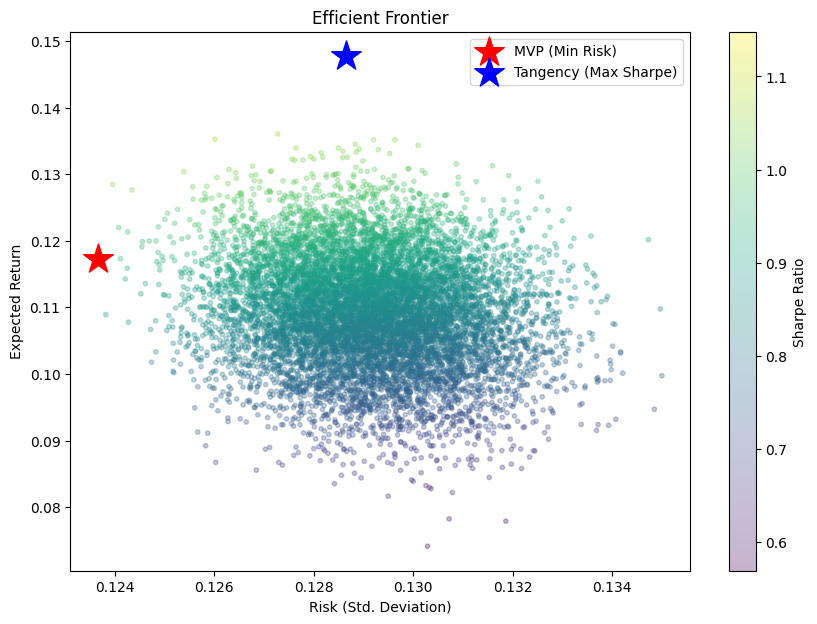


Top 10 Stocks (Based on Average Weight from MVP & Tangency Portfolios):
    Ticker  MVP_Weight  Tangency_Weight  Average_Weight
375   PLTR    0.003878         0.004061        0.003969
96   CMCSA    0.003877         0.003993        0.003935
280    LHX    0.003632         0.004060        0.003846
431    TAP    0.003764         0.003872        0.003818
338    NOC    0.003709         0.003914        0.003811
36     APA    0.003613         0.004001        0.003807
30     AMT    0.003883         0.003645        0.003764
101    CNC    0.003751         0.003761        0.003756
266    KHC    0.003526         0.003919        0.003723
452     TT    0.003467         0.003869        0.003668

Next update in 60 seconds...


[                       1%                       ]  7 of 503 completed


Fetching real-time stock data...


[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['ABNB']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
['ETR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-03-17 -> 2025-03-17)')


Skipping this update due to an error in fetching data.

Next update in 60 seconds...

Fetching real-time stock data...


[*********************100%***********************]  503 of 503 completed



Running Monte Carlo Simulation...


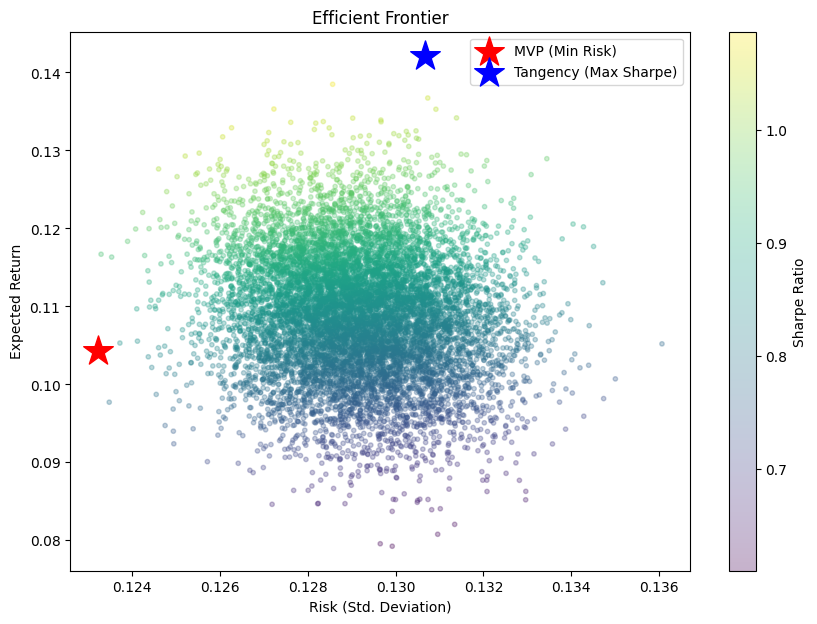


Top 10 Stocks (Based on Average Weight from MVP & Tangency Portfolios):
    Ticker  MVP_Weight  Tangency_Weight  Average_Weight
174    EXC    0.004074         0.003890        0.003982
105    COP    0.003928         0.003858        0.003893
458   UBER    0.003788         0.003886        0.003837
103    COF    0.003611         0.003928        0.003769
37     APD    0.003663         0.003871        0.003767
388    PWR    0.003858         0.003578        0.003718
69     BSX    0.003841         0.003519        0.003680
337    NKE    0.004012         0.003207        0.003609
491    WRB    0.003653         0.003497        0.003575
343   NTRS    0.003717         0.003309        0.003513

Next update in 60 seconds...

Fetching real-time stock data...


[*********************100%***********************]  503 of 503 completed



Running Monte Carlo Simulation...


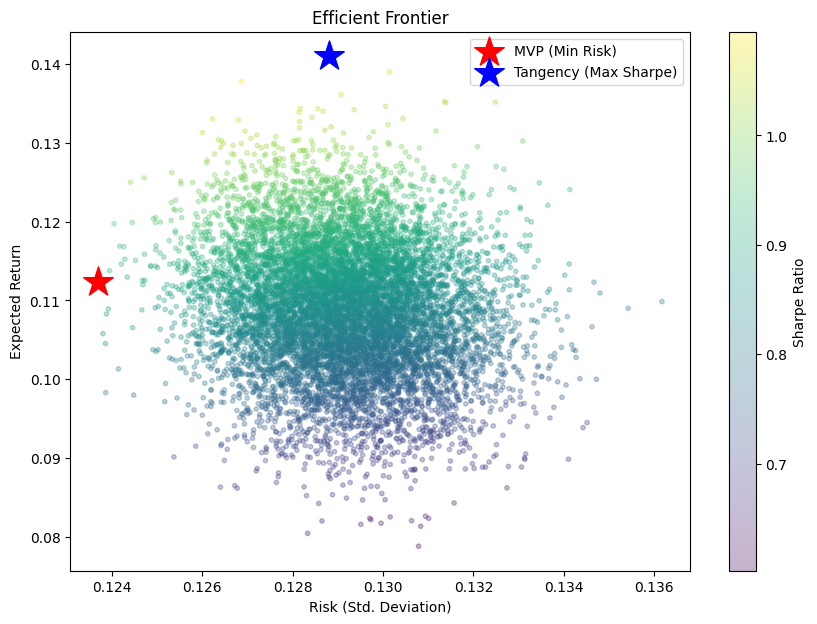


Top 10 Stocks (Based on Average Weight from MVP & Tangency Portfolios):
    Ticker  MVP_Weight  Tangency_Weight  Average_Weight
171    ETR    0.003857         0.003994        0.003925
301    MCK    0.003894         0.003801        0.003847
270    KMB    0.003834         0.003813        0.003824
466    USB    0.003635         0.003920        0.003778
454    TXN    0.003895         0.003593        0.003744
160    EMR    0.003415         0.003998        0.003706
347    NWS    0.003474         0.003842        0.003658
485    WEC    0.003698         0.003603        0.003650
303   MDLZ    0.003551         0.003674        0.003613
369     PG    0.003468         0.003707        0.003587

Next update in 60 seconds...

Fetching real-time stock data...


[**********************49%                       ]  248 of 503 completed

In [ ]:
tickers = get_sp500_tickers()
prev_data = None

while True:
    print("\nFetching real-time stock data...")
    stock_data = get_realtime_data(tickers)
    
    if stock_data is None or stock_data.empty:
        print("Skipping this update due to an error in fetching data.")
    else:
        if prev_data is None or not stock_data.equals(prev_data):
            print("\nRunning Monte Carlo Simulation...")
            results_df, mvp_weights, tangency_weights = run_monte_carlo(stock_data)
            
            if results_df is not None:
                mvp_idx = results_df["Risk"].idxmin(skipna=True)
                tangency_idx = results_df["Sharpe"].idxmax(skipna=True)
                plot_efficient_frontier(results_df, mvp_idx, tangency_idx)
                print_integrated_top_stocks(mvp_weights, tangency_weights, stock_data.columns)
            
            prev_data = stock_data.copy()
        else:
            print("\nNo significant change in stock data. Skipping simulation.")
    
    print("\nNext update in 60 seconds...")
    time.sleep(60)